## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV

#Model Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Model Building
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

#Model Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Fetch Data

In [3]:
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [7]:
train.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [8]:
train.shape

(614, 13)

## Data Visualization

### 1. Univariate Analysis

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

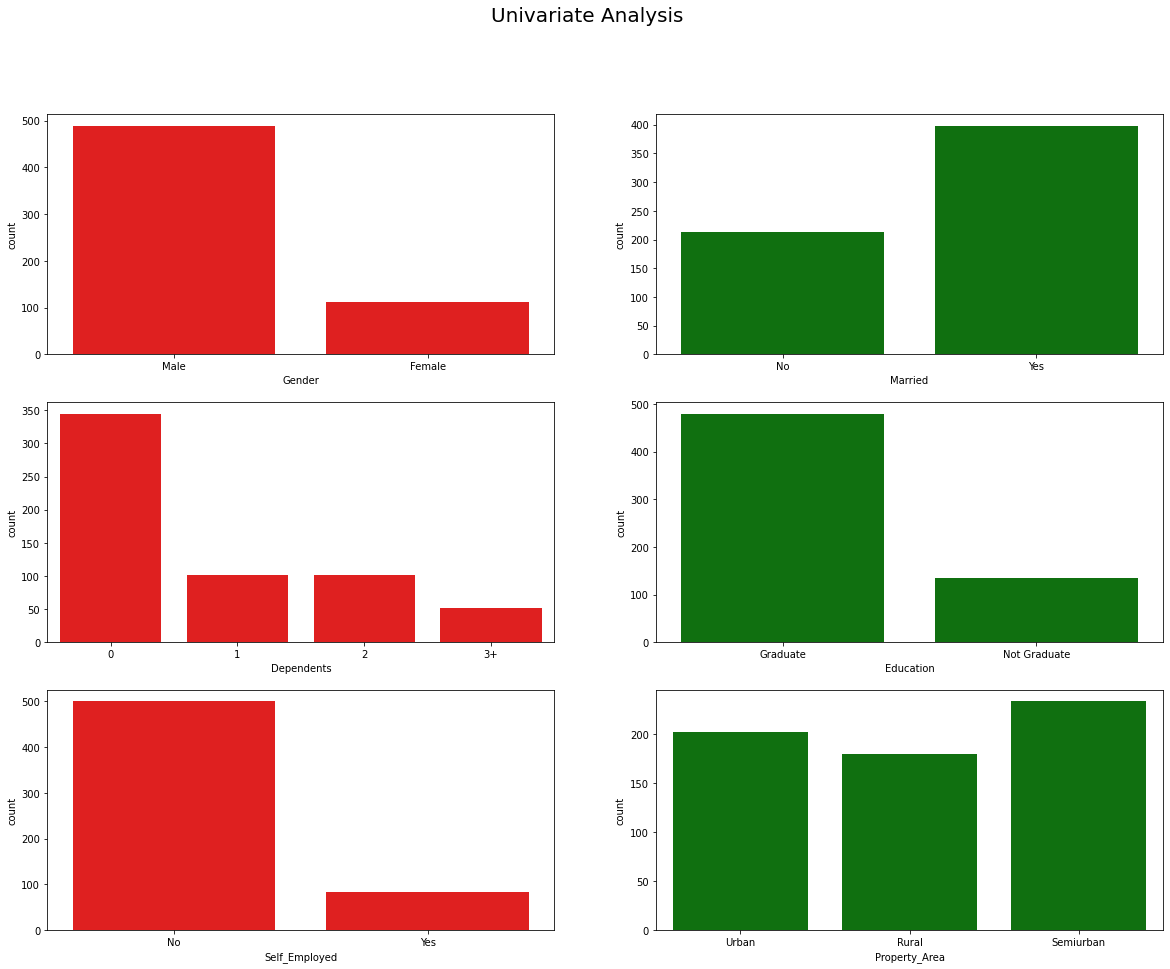

In [9]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3,2, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.countplot(x='Gender',data=train,ax=axes[0,0],color='red')
sns.countplot(x='Married',data=train,ax=axes[0,1],color='green')
sns.countplot(x='Dependents',data=train,ax=axes[1,0],color='red')
sns.countplot(x='Education',data=train,ax=axes[1,1],color='green')
sns.countplot(x='Self_Employed',data=train,ax=axes[2,0],color='red')
sns.countplot(x='Property_Area',data=train,ax=axes[2,1],color='green')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

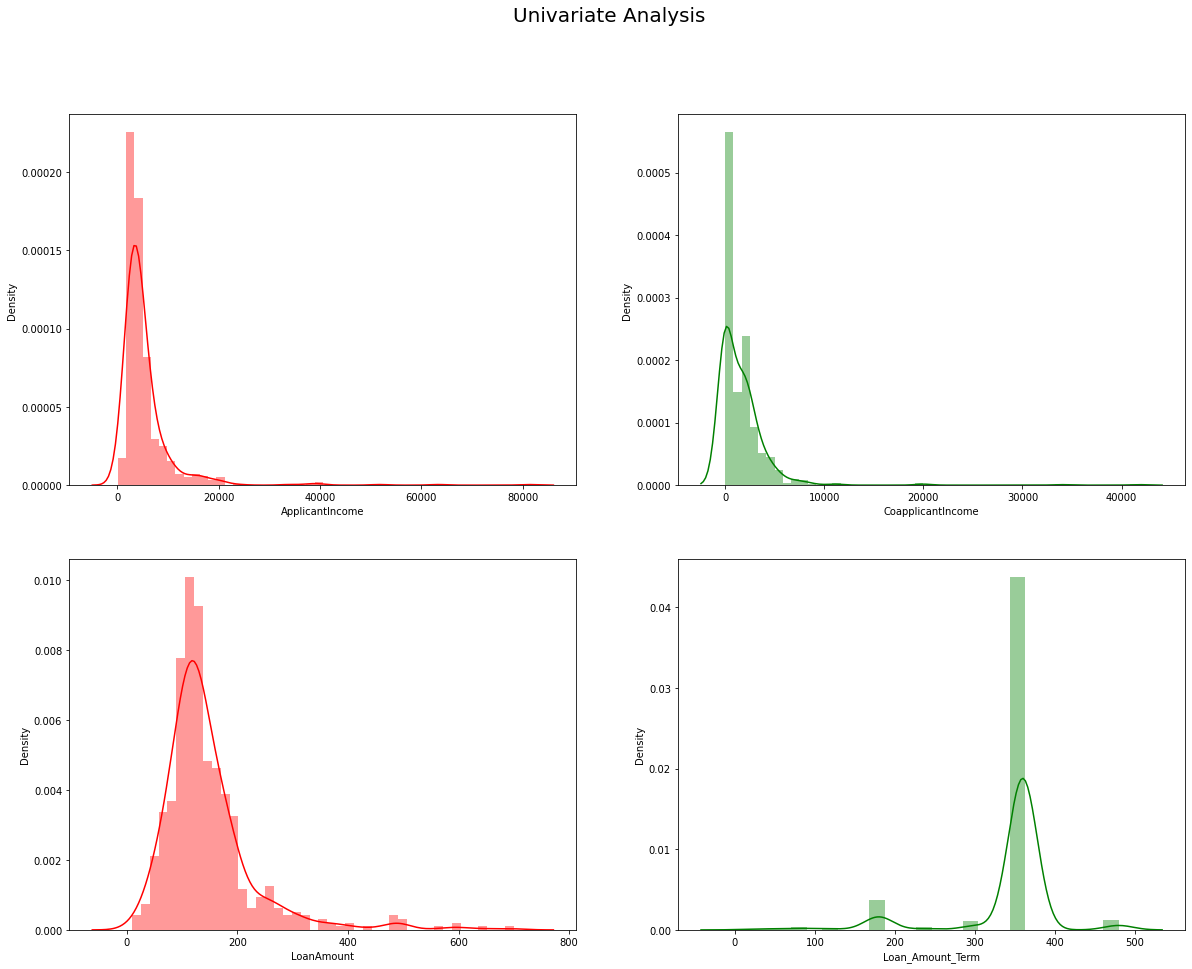

In [10]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,2, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(train['ApplicantIncome'],ax=axes[0,0],color='red')
sns.distplot(train['CoapplicantIncome'],ax=axes[0,1],color='green')
sns.distplot(train['LoanAmount'],ax=axes[1,0],color='red')
sns.distplot(train['Loan_Amount_Term'],ax=axes[1,1],color='green')

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Treat Data

This data has null values so we need to first do Imputation according to DataType

In [14]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].median(),inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

In [15]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)

In [17]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Now, we have no NULL values

In [18]:
train.shape,test.shape

((614, 13), (367, 12))

In [19]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


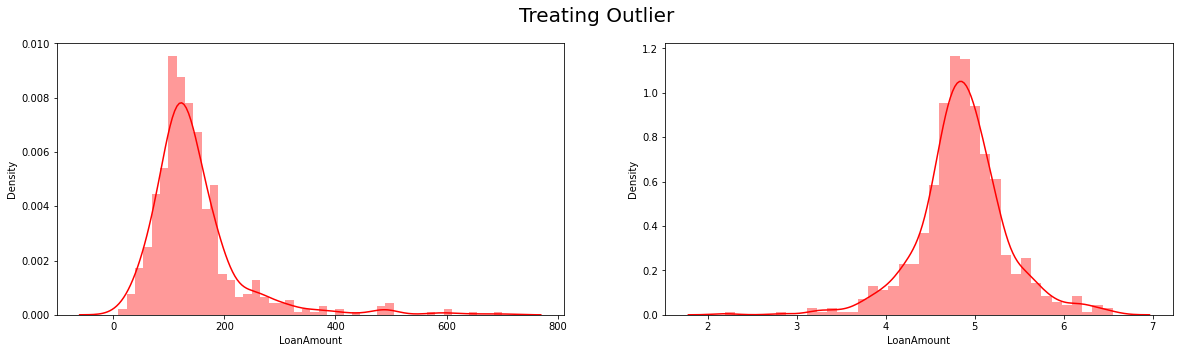

In [20]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('Treating Outlier',fontsize=20)
sns.distplot(train['LoanAmount'],ax=axes[0],color='red')
sns.distplot(np.log(train['LoanAmount']),ax=axes[1],color='red')

train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

### Drop Loan_ID as it is of no use from both Train and Test Data

In [21]:
train = train.drop(['Loan_ID'],axis=1)
test = test.drop(['Loan_ID'],axis=1)

In [22]:
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030


In [23]:
test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282


In [24]:
train.columns,test.columns

(Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
        'LoanAmount_log'],
       dtype='object'),
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log'],
       dtype='object'))

### So, it is clear that Loan Status column is our Target variable

## Convert Category to Numbers

### Using One-Hot Encoding on Features

In [25]:
ctrain = train.loc[:,['Gender','Married','Education','Self_Employed','Property_Area']]
ctrain = pd.get_dummies(ctrain)
ctrain.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1


In [26]:
ctrain.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### Using Label Encoder on Target Column

In [27]:
le = LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])
train = train.drop(['Gender','Married','Education','Self_Employed','Property_Area','LoanAmount'],axis=1)
train.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log
0,0,5849,0.0,360.0,1.0,1,4.986426
1,1,4583,1508.0,360.0,1.0,0,4.852030


In [28]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [29]:
ndf = train.loc[:,['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount_log']]

In [30]:
ndf = norm_func(ndf)
ndf.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,LoanAmount_log
0,0.070489,0.000000,0.74359,0.640628
1,0.054830,0.036192,0.74359,0.609760
2,0.035250,0.000000,0.74359,0.457624
3,0.030093,0.056592,0.74359,0.594936
4,0.072356,0.000000,0.74359,0.631977


In [31]:
def stand_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [32]:
sdf = train.loc[:,['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount_log']]

In [33]:
sdf = stand_func(sdf)
sdf.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,LoanAmount_log
0,0.072931,-0.554036,0.279623,0.250436
1,-0.134302,-0.038700,0.279623,-0.020209
2,-0.393427,-0.554036,0.279623,-1.354098
3,-0.461686,0.251774,0.279623,-0.150177
4,0.097649,-0.554036,0.279623,0.174584


In [34]:
train.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log
0,0,5849,0.0,360.0,1.0,1,4.986426
1,1,4583,1508.0,360.0,1.0,0,4.852030


In [116]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount_log','Loan_Amount_Term'],axis=1)
train['Dependents'] = train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
train = pd.concat([ctrain,sdf,train],axis=1)
train = pd.DataFrame(data=train,columns=['Gender_Female', 'Gender_Male','Married_No', 'Married_Yes', 'Dependents', 'Education_Graduate', 'Education_Not Graduate','Self_Employed_No','Self_Employed_Yes','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount_log','Loan_Amount_Term','Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban','Property_Area_Urban', 'Loan_Status'])
train.head()

ValueError: cannot reindex from a duplicate axis

In [36]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [37]:
#!pip install yellowbrick

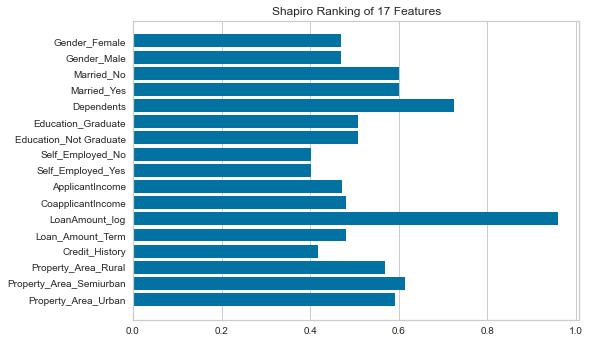

<AxesSubplot:title={'center':'Shapiro Ranking of 17 Features'}>

In [38]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show() 

## Balancing Target Column - Upsampling

In [39]:
from imblearn.combine import SMOTETomek
# Performing Oversampling method to handle imbalanced data

smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_resample(X,y)

In [40]:
X_res.shape,y_res.shape,X.shape,y.shape

((804, 17), (804,), (614, 17), (614,))

## Train-Test Split Model Validation Technique

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

## K-Fold Model Validation Technique

In [42]:
kfold = KFold(n_splits=20,shuffle=True,random_state=10)

# 1. Logistic Regression

In [43]:
model1 = LogisticRegression(max_iter=500,random_state=10)
model1.fit(X_train,y_train)
result1 = model1.score(X_train,y_train)
result2 = model1.score(X_test,y_test)
result1,result2

(0.8087091757387247, 0.7763975155279503)

In [44]:
model1 = LogisticRegression(max_iter=1500,random_state=10)
model1.fit(X_res,y_res)
result3 = cross_val_score(model1,X_res,y_res,cv=kfold)
result3.mean()

0.8221951219512196

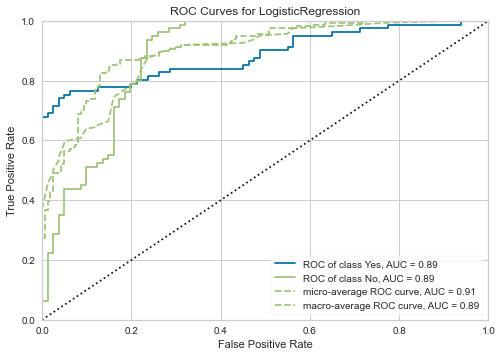

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
from yellowbrick.classifier import ROCAUC
visualizer1 = ROCAUC(model1, classes=["Yes", "No"])
visualizer1.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)        # Evaluate the model on the test data
visualizer1.show()

USING RECURSIVE FEATURE ELIMINATION:

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 10)
fit = rfe.fit(X_res, y_res)

In [47]:
fit.support_

array([False, False,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True])

In [48]:
# Feature Ranking:
fit.ranking_

array([2, 3, 1, 1, 6, 1, 1, 1, 1, 5, 7, 4, 8, 1, 1, 1, 1])

In [49]:
train.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount_log', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [50]:
x1=train[[ 'Married_No', 'Married_Yes',
        'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status']]

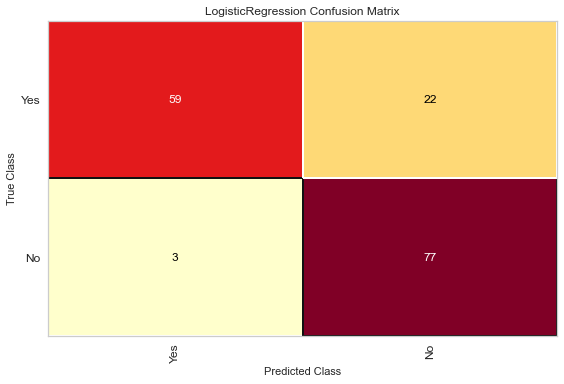

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [51]:
from yellowbrick.classifier import ConfusionMatrix
classes = ['Yes','No']
# The ConfusionMatrix visualizer taxes a model
cm1 = ConfusionMatrix(model1, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm1.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm1.score(X_test, y_test)

cm1.show()

# 2. Decision Tree

In [52]:
dtmodel = DecisionTreeClassifier(random_state=10)
a=[3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'criterion':['entropy','gini'],'min_samples_split':a,'min_samples_leaf':a}]
gridparam = GridSearchCV(dtmodel,parameter)
gridparam.fit(X_res,y_res)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [53]:
gridparam.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [54]:
model2 = DecisionTreeClassifier(random_state=10,max_depth=4,criterion='gini',max_leaf_nodes=8,min_samples_split=3,min_samples_leaf=3)
model2.fit(X_res,y_res)
result4 = cross_val_score(model2,X_res,y_res,cv=kfold)
result4.mean()

0.7873170731707317

In [55]:
model2.fit(X_train,y_train)
result5 = model2.score(X_train,y_train)
result6 = model2.score(X_test,y_test)
result5,result6

(0.7900466562986003, 0.7577639751552795)

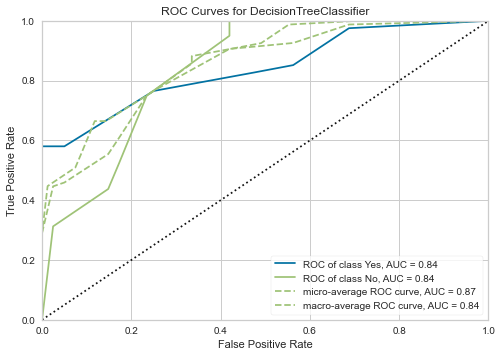

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [56]:
from yellowbrick.classifier import ROCAUC
visualizer2 = ROCAUC(model2, classes=["Yes", "No"])
visualizer2.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)        # Evaluate the model on the test data
visualizer2.show()

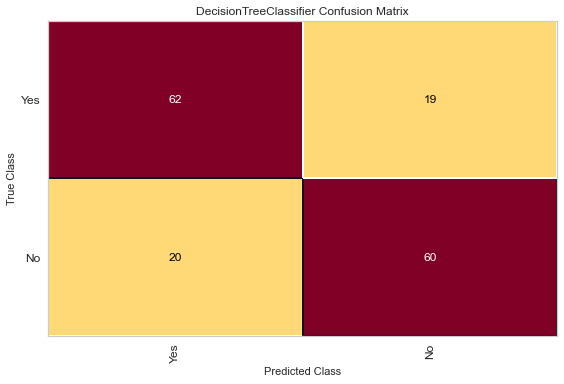

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [57]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm2 = ConfusionMatrix(model2, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm2.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm2.score(X_test, y_test)

cm2.show()

# 3. Bagging Classifier

In [58]:
num1_trees = [100,200,300,400,500,600,700,800,900,1000]
cart1 = DecisionTreeClassifier(random_state=10,max_depth=4,max_leaf_nodes=5,min_samples_leaf=3,min_samples_split=6,criterion='gini')
a = LogisticRegression(max_iter=1000,solver='liblinear')
parameter = [{'base_estimator':[cart1,a],'n_estimators':num1_trees}]
gB_model = BaggingClassifier()
gridBagging = GridSearchCV(gB_model,parameter)
gridBagging.fit(X_res,y_res)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid=[{'base_estimator': [DecisionTreeClassifier(max_depth=4,
                                                                    max_leaf_nodes=5,
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=6,
                                                                    random_state=10),
                                             LogisticRegression(max_iter=1000,
                                                                solver='liblinear')],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                           800, 900, 1000]}])

In [59]:
gridBagging.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=3,
                        min_samples_split=6, random_state=10),
 'n_estimators': 300}

In [60]:
cart2 = DecisionTreeClassifier(random_state=10,max_depth=4,max_leaf_nodes=5,min_samples_leaf=3,min_samples_split=6,criterion='gini')
model3 = BaggingClassifier(base_estimator=cart2,n_estimators=100)
model3.fit(X_res,y_res)
result7 = cross_val_score(model3,X_res,y_res,cv=kfold)
result7.mean()

0.7860670731707318

In [61]:
model3.fit(X_train,y_train)
result8 = model3.score(X_train,y_train)
result9 = model3.score(X_test,y_test)
result8,result9

(0.7884914463452566, 0.7950310559006211)

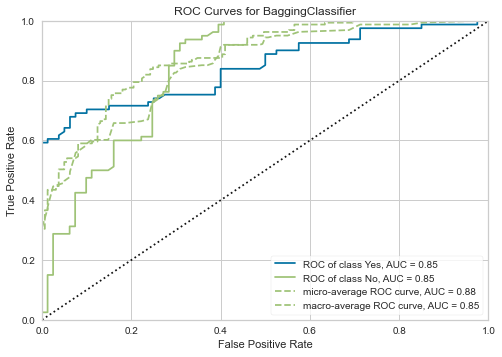

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
visualizer3 = ROCAUC(model3, classes=["Yes", "No"])
visualizer3.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer3.score(X_test, y_test)        # Evaluate the model on the test data
visualizer3.show()

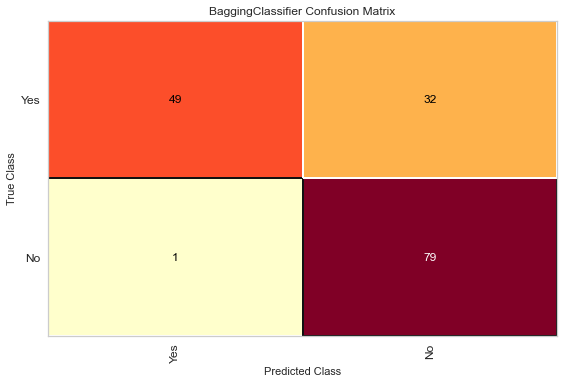

<AxesSubplot:title={'center':'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [63]:
# The ConfusionMatrix visualizer taxes a model
cm3 = ConfusionMatrix(model3, classes=classes)
cm3.fit(X_train, y_train)
cm3.score(X_test, y_test)
cm3.show()

# 4. Random Forest Classifier

In [64]:
a = range(2,10)
parameter = [{'criterion':['gini','entropy'],'max_depth':a,'max_leaf_nodes':a}]
Rmodel = RandomForestClassifier()
gridRF = GridSearchCV(Rmodel,parameter)
gridRF.fit(X_res,y_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10),
                          'max_leaf_nodes': range(2, 10)}])

In [65]:
gridRF.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 9}

In [66]:
model4 = RandomForestClassifier(n_estimators=600,criterion='entropy', max_depth=9, max_leaf_nodes=9,random_state=10)
kfold = KFold(n_splits=20,shuffle=True,random_state=10)
model4.fit(X_res,y_res)
result10 = cross_val_score(model4,X_res,y_res,cv=kfold)
result10.mean()

0.7874085365853658

In [67]:
model4.fit(X_train,y_train)
result11 = model4.score(X_train,y_train)
result12 = model4.score(X_test,y_test)
result11,result12

(0.8320373250388803, 0.8136645962732919)

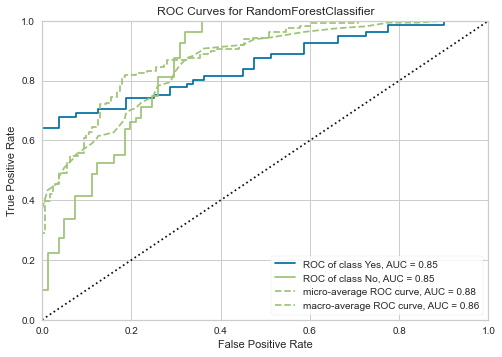

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [68]:
visualizer4 = ROCAUC(model4, classes=["Yes", "No"])
visualizer4.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer4.score(X_test, y_test)        # Evaluate the model on the test data
visualizer4.show()

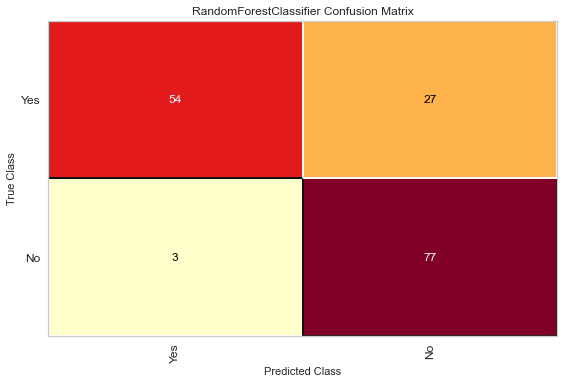

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [69]:
# The ConfusionMatrix visualizer taxes a model
cm4 = ConfusionMatrix(model4, classes=classes)
cm4.fit(X_train, y_train)
cm4.score(X_test, y_test)
cm4.show()

# 5. Ada-Boost Classifier

In [70]:
model5 = AdaBoostClassifier(base_estimator=cart2,n_estimators=1000,random_state=10)
model5.fit(X_res,y_res)
result13 = cross_val_score(model5,X_res,y_res,cv=kfold)
result13.mean()

0.8134756097560976

In [71]:
model5.fit(X_train,y_train)
result14 = model5.score(X_train,y_train)
result15 = model5.score(X_test,y_test)
result14,result15

(1.0, 0.782608695652174)

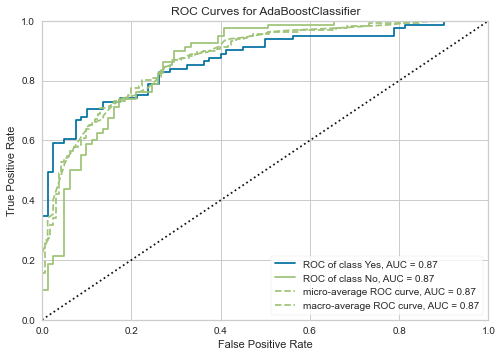

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [72]:
visualizer5 = ROCAUC(model5, classes=["Yes", "No"])
visualizer5.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer5.score(X_test, y_test)        # Evaluate the model on the test data
visualizer5.show()

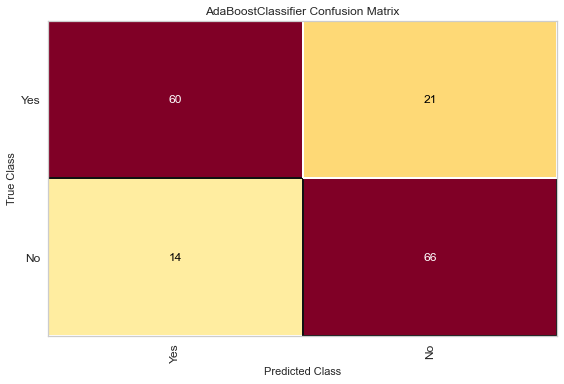

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [73]:
# The ConfusionMatrix visualizer taxes a model
cm5 = ConfusionMatrix(model5, classes=classes)
cm5.fit(X_train, y_train)
cm5.score(X_test, y_test)
cm5.show()

# 6. STACKING

In [74]:
estimators = []
model_1 = LogisticRegression(max_iter=1500,random_state=10)
estimators.append(('Logistic Regression', model_1))
model_2 = DecisionTreeClassifier(random_state=10,max_depth=6,criterion='gini',max_leaf_nodes=7,min_samples_split=9,min_samples_leaf=3)
estimators.append(('Decision Tree', model_2))
model_3 = SVC(random_state=10)
estimators.append(('SVM', model_3))
model_4 = BaggingClassifier(base_estimator=cart2,n_estimators=700,random_state=10)
estimators.append(('Bagging Classifier', model_4))
model_5 = RandomForestClassifier(n_estimators=800,criterion='gini', max_depth=9, max_leaf_nodes=9,random_state=10)
estimators.append(('Random Forest Classifier', model_5))
model_6 = AdaBoostClassifier(base_estimator=cart2,n_estimators=1000,random_state=10)
estimators.append(('AdaBoost Classifier', model_6))

In [75]:
model6 = VotingClassifier(estimators)
kfold = KFold(n_splits=20,shuffle=True,random_state=10)
model6.fit(X_res,y_res)
result16 = cross_val_score(model6,X_res,y_res,cv=kfold)
result16.mean() 

0.8196341463414634

In [76]:
model6.fit(X_train,y_train)
result17 = model6.score(X_train,y_train)
result18 = model6.score(X_test,y_test)
result17,result18

(0.8398133748055988, 0.8136645962732919)

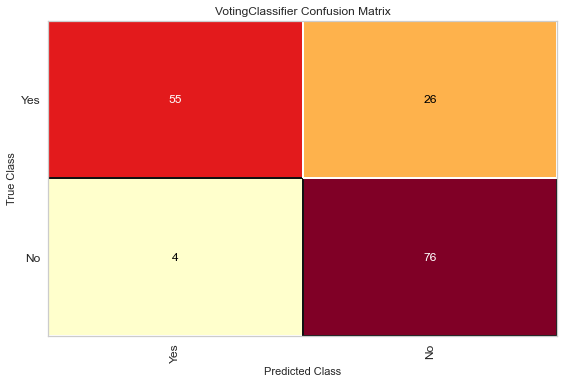

<AxesSubplot:title={'center':'VotingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [77]:
# The ConfusionMatrix visualizer taxes a model
cm6 = ConfusionMatrix(model6, classes=classes)
cm6.fit(X_train, y_train)
cm6.score(X_test, y_test)
cm6.show()

# 7. XG-Boost

In [78]:
import warnings
warnings.filterwarnings('ignore')
model7 = XGBClassifier()
kfold = KFold(n_splits=20,shuffle=True,random_state=10)
model7.fit(X_res,y_res)
result19 = cross_val_score(model7,X_res,y_res,cv=kfold)
result19.mean()

0.8322256097560976

In [79]:
model7.fit(X_train,y_train)
result20 = model7.score(X_train,y_train)
result21 = model7.score(X_test,y_test)
result20,result21

(1.0, 0.7763975155279503)

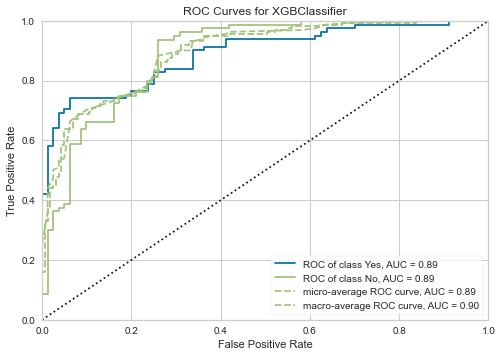

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [80]:
visualizer7 = ROCAUC(model7, classes=["Yes", "No"])
visualizer7.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer7.score(X_test, y_test)        # Evaluate the model on the test data
visualizer7.show()

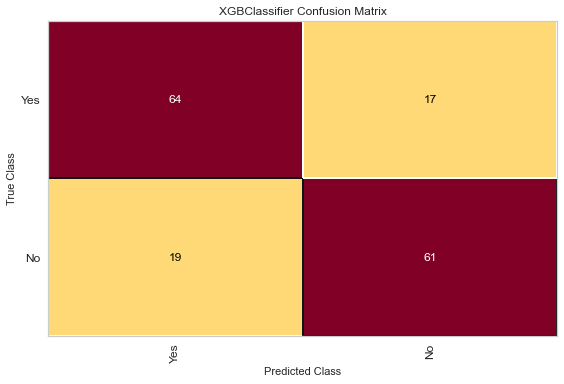

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [81]:
# The ConfusionMatrix visualizer taxes a model
cm7 = ConfusionMatrix(model7, classes=classes)
cm7.fit(X_train, y_train)
cm7.score(X_test, y_test)
cm7.show()

# 8. KNN Classifier

In [82]:
kmodel = KNeighborsClassifier()
param_grid = [{'n_neighbors':range(2,40)}]
gsv = GridSearchCV(kmodel,param_grid)
gsv.fit(X_res,y_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(2, 40)}])

In [83]:
gsv.best_params_,gsv.best_score_

({'n_neighbors': 3}, 0.7910481366459627)

In [84]:
result1 = []
result2 = []
for n in range(2,20):
    model = KNeighborsClassifier(n_neighbors=n,metric='euclidean')
    model.fit(X_train,y_train)
    result1.append(model.score(X_train,y_train))
    result2.append(model.score(X_test,y_test))
frame = pd.DataFrame({'n_neighbors':range(2,20),'Train Accuracy':result1,'Test Accuracy':result2})
frame

,n_neighbors,Train Accuracy,Test Accuracy
0,2,0.911353,0.732919
1,3,0.911353,0.739130
2,4,0.866252,0.695652
3,5,0.861586,0.701863
4,6,0.827372,0.664596
5,7,0.832037,0.677019
6,8,0.805599,0.658385
7,9,0.802488,0.652174
8,10,0.786936,0.639752
9,11,0.796267,0.627329


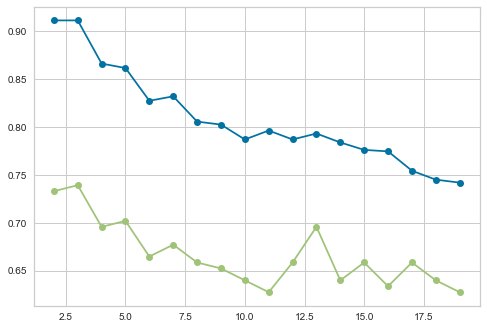

In [85]:
plt.plot(frame['n_neighbors'],frame['Train Accuracy'],marker='o')
plt.plot(frame['n_neighbors'],frame['Test Accuracy'],marker='o')

In [86]:
model8 = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model8.fit(X_res,y_res)
result22=cross_val_score(model8, X_res,y_res,cv=kfold)
result22.mean()

0.8120426829268294

In [87]:
model8 = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model8.fit(X_train,y_train)
result23 = model8.score(X_train,y_train)
result24 = model8.score(X_test,y_test)
result23,result24

(0.911353032659409, 0.7391304347826086)

# 9. Naive Bayes Classifier

In [88]:
model9 = GaussianNB()
model9.fit(X_train,y_train)
result25 = model9.score(X_train,y_train)
result26 = model9.score(X_test,y_test)
result25,result26

(0.7791601866251944, 0.7453416149068323)

In [89]:
model9.fit(X_res,y_res)
result27=cross_val_score(model9, X_res,y_res,cv=kfold)
result27.mean()

0.7699390243902439

# 10. Neural Network

In [90]:
# Import Library
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [91]:
# Defining different Layers
input_neurons = X_train.shape[1]
output_neurons = 1
number_of_hidden_layers = 3
neuron_hidden_layer_1 = 20
neuron_hidden_layer_2 = 15
neuron_hidden_layer_3 = 10

In [92]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation = 'relu'))
model.add(Dense(units=neuron_hidden_layer_2,activation = 'relu'))
model.add(Dense(units=neuron_hidden_layer_3,activation = 'relu'))
model.add(Dense(units=output_neurons,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [94]:
# Train the model
model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Epoch 1/200
21/21 [==============================] - 11s 233ms/step - loss: 0.6850 - accuracy: 0.5306 - val_loss: 0.6804 - val_accuracy: 0.5714
Epoch 2/200
21/21 [==============================] - 0s 11ms/step - loss: 0.6599 - accuracy: 0.5979 - val_loss: 0.6759 - val_accuracy: 0.5776
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 0.6484 - accuracy: 0.6131 - val_loss: 0.6702 - val_accuracy: 0.5404
Epoch 4/200
21/21 [==============================] - 0s 9ms/step - loss: 0.6195 - accuracy: 0.6663 - val_loss: 0.6652 - val_accuracy: 0.5714
Epoch 5/200
21/21 [==============================] - 0s 10ms/step - loss: 0.6077 - accuracy: 0.6646 - val_loss: 0.6554 - val_accuracy: 0.5839
Epoch 6/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5862 - accuracy: 0.6921 - val_loss: 0.6432 - val_accuracy: 0.5901
Epoch 7/200
21/21 [==============================] - 0s 11ms/step - loss: 0.5698 - accuracy: 0.6940 - val_loss: 0.6355 - val_accuracy: 0.6087
Epoch 

21/21 [==============================] - 0s 9ms/step - loss: 0.2787 - accuracy: 0.9023 - val_loss: 0.7020 - val_accuracy: 0.7516
Epoch 116/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2652 - accuracy: 0.8960 - val_loss: 0.7029 - val_accuracy: 0.7578
Epoch 117/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2372 - accuracy: 0.9033 - val_loss: 0.6937 - val_accuracy: 0.7453
Epoch 118/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2395 - accuracy: 0.9112 - val_loss: 0.7168 - val_accuracy: 0.7453
Epoch 119/200
21/21 [==============================] - 0s 12ms/step - loss: 0.2381 - accuracy: 0.9128 - val_loss: 0.7010 - val_accuracy: 0.7391
Epoch 120/200
21/21 [==============================] - 0s 10ms/step - loss: 0.2178 - accuracy: 0.9313 - val_loss: 0.6974 - val_accuracy: 0.7578
Epoch 121/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2526 - accuracy: 0.9094 - val_loss: 0.7235 - val_accuracy: 0.7453
Epoch 122/2

In [95]:
# Evaluate model performance
prediction = model.predict_classes(X_test)
prediction1 = model.predict_classes(X_train)
result28 = accuracy_score(y_train,prediction1)
result29 = accuracy_score(y_test,prediction)

# 11. Gradient Boosting Classifier

In [96]:
model11 = GradientBoostingClassifier(max_depth=3,max_features='sqrt')
model11.fit(X_train,y_train)
result30 = model11.score(X_train,y_train)
result31 = model11.score(X_test,y_test)
result30,result31

(0.8911353032659409, 0.7763975155279503)

## Calculating Test Accuracy for all methods from Test Data

In [97]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


In [98]:
ctest = test.loc[:,['Gender','Married','Education','Self_Employed','Property_Area']]
ctest = pd.get_dummies(ctest)
ctest.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,0,0,1
2,0,1,0,1,1,0,1,0,0,0,1
3,0,1,0,1,1,0,1,0,0,0,1
4,0,1,1,0,0,1,1,0,0,0,1


In [99]:
test = test.drop(['Gender','Married','Education','Self_Employed','Property_Area','LoanAmount'],axis=1)
test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log
0,0,5720,0,360.0,1.0,4.700480
1,1,3076,1500,360.0,1.0,4.836282
2,2,5000,1800,360.0,1.0,5.337538
3,2,2340,2546,360.0,1.0,4.605170
4,0,3276,0,360.0,1.0,4.356709


In [100]:
#ntest = test.loc[:,['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount_log']]
#ntest = norm_func(ntest)
#ntest.head()

In [101]:
stest = test.loc[:,['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount_log']]
stest = stand_func(stest)
stest.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,LoanAmount_log
0,0.186206,-0.672417,0.270234,-0.306744
1,-0.352211,-0.029808,0.270234,0.019458
2,0.039587,0.098714,0.270234,1.223502
3,-0.502089,0.418306,0.270234,-0.535684
4,-0.311484,-0.672417,0.270234,-1.132501


In [102]:
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount_log','Loan_Amount_Term'],axis=1)
test['Dependents'] = test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
test.head()

,Dependents,Credit_History
0,0,1.0
1,1,1.0
2,2,1.0
3,2,1.0
4,0,1.0


In [103]:
test = pd.concat([ctest,stest,test],axis=1)
test = pd.DataFrame(data=test,columns=['Gender_Female', 'Gender_Male','Married_No', 'Married_Yes', 'Dependents', 'Education_Graduate', 'Education_Not Graduate','Self_Employed_No','Self_Employed_Yes','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount_log',
       'Loan_Amount_Term','Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban','Property_Area_Urban'])

In [104]:
test.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,1,0,1,0,0.186206,-0.672417,-0.306744,0.270234,1.0,0,0,1
1,0,1,0,1,1,1,0,1,0,-0.352211,-0.029808,0.019458,0.270234,1.0,0,0,1
2,0,1,0,1,2,1,0,1,0,0.039587,0.098714,1.223502,0.270234,1.0,0,0,1
3,0,1,0,1,2,1,0,1,0,-0.502089,0.418306,-0.535684,0.270234,1.0,0,0,1
4,0,1,1,0,0,0,1,1,0,-0.311484,-0.672417,-1.132501,0.270234,1.0,0,0,1


In [105]:
Xtest = test

In [106]:
prediction2 = model11.predict(Xtest)

In [107]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [108]:
submission['Loan_Status'] = prediction2
submission['Loan_ID'] = test_original['Loan_ID']

In [109]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [110]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('GBmodel1.csv',index=False)

## Overall Summary

In [111]:
Results = pd.DataFrame({'Models':['Logistic Regression Classifier','Decision Tree Classifier','Bagging Classifier','Random Forest Classifier','AdaBoost Classifier','Stacking','XGBoost Classifier','KNN Classifier','Naive Bayes Classifier','Neural Network','Gradient Boost Classifier'],'K-Fold Accuracy':[result3.mean(),result4.mean(),result7.mean(),result10.mean(),result13.mean(),result16.mean(),result19.mean(),result22.mean(),result27.mean(),'-','-'],'Train Accuracy':[result1,result5,result8,result11,result14,result17,result20,result23,result25,result28,result30],'Validation Accuracy':[result2,result6,result9,result12,result15,result18,result21,result24,result26,result29,result31]})
Results

,Models,K-Fold Accuracy,Train Accuracy,Validation Accuracy
0,Logistic Regression Classifier,0.822195,"[0.911353032659409, 0.911353032659409, 0.86625...","[0.7329192546583851, 0.7391304347826086, 0.695..."
1,Decision Tree Classifier,0.787317,0.790047,0.757764
2,Bagging Classifier,0.786067,0.788491,0.795031
3,Random Forest Classifier,0.787409,0.832037,0.813665
4,AdaBoost Classifier,0.813476,1,0.782609
5,Stacking,0.819634,0.839813,0.813665
6,XGBoost Classifier,0.832226,1,0.776398
7,KNN Classifier,0.812043,0.911353,0.73913
8,Naive Bayes Classifier,0.769939,0.77916,0.745342
9,Neural Network,-,0.934681,0.73913


## The best model seems to be Stacking